## Exploratory data analysis / All traffic

In [37]:
import pandas as pd

In [38]:
data_1 = pd.read_csv('clustering_1.csv')
data_1.drop(['@timestamp'], inplace=True, axis = 'columns')

data_2 = pd.read_csv('clustering_2.csv')
data_2.drop(['@timestamp', '@timestamp.1'], inplace=True, axis = 'columns')

data = pd.concat([data_1, data_2], axis=0, ignore_index=True, sort=False)
data

,destination.ip,destination.port,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,source.port,source.ip,network.transport,network.type
0,172.31.91.217,22,"123,300",141,"1,140,356,367,865","133,212",285,"9,912",144,"34,179",193.146.78.93,tcp,ipv4
1,34.238.162.185,"9,200","547,054",578,"1,140,098,665,211","2,934,616","1,672","2,387,562","1,094","38,310",172.21.0.2,tcp,ipv4
2,34.238.162.185,"9,200","273,527",289,"1,140,098,633,856","1,467,308",836,"1,193,781",547,"38,310",172.31.91.217,tcp,ipv4
3,34.238.162.185,"9,200","19,073,884","5,734","1,140,094,145,161","108,722,289","17,228","89,648,405","11,494","40,992",172.31.91.217,tcp,ipv4
4,192.168.17.11,"35,220","9,414",96,"1,140,095,773,053","22,228",242,"12,814",146,"5,671",192.168.17.17,tcp,ipv4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136511,192.168.17.2,"13,004","4,860",6,"544,248","7,028",18,"2,168",12,"44,562",192.168.17.3,tcp,ipv4
136512,192.168.17.13,"13,005","4,868",6,"836,614","7,036",18,"2,168",12,"38,376",192.168.17.3,tcp,ipv4
136513,192.168.17.14,"13,003","4,872",6,"893,206","7,040",18,"2,168",12,"53,082",192.168.17.3,tcp,ipv4
136514,192.168.17.16,"13,006","4,852",6,"613,349","7,020",18,"2,168",12,"46,386",192.168.17.3,tcp,ipv4


In [39]:
data.dtypes

destination.ip         object
destination.port       object
destination.bytes      object
destination.packets    object
event.duration         object
network.bytes          object
network.packets        object
source.bytes           object
source.packets         object
source.port            object
source.ip              object
network.transport      object
network.type           object
dtype: object

In [40]:
data.head()

,destination.ip,destination.port,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,source.port,source.ip,network.transport,network.type
0,172.31.91.217,22,"123,300",141,"1,140,356,367,865","133,212",285,"9,912",144,"34,179",193.146.78.93,tcp,ipv4
1,34.238.162.185,"9,200","547,054",578,"1,140,098,665,211","2,934,616","1,672","2,387,562","1,094","38,310",172.21.0.2,tcp,ipv4
2,34.238.162.185,"9,200","273,527",289,"1,140,098,633,856","1,467,308",836,"1,193,781",547,"38,310",172.31.91.217,tcp,ipv4
3,34.238.162.185,"9,200","19,073,884","5,734","1,140,094,145,161","108,722,289","17,228","89,648,405","11,494","40,992",172.31.91.217,tcp,ipv4
4,192.168.17.11,"35,220","9,414",96,"1,140,095,773,053","22,228",242,"12,814",146,"5,671",192.168.17.17,tcp,ipv4


PREPROCESAMIENTO

In [41]:
data.drop(['destination.ip', 'source.ip', 'network.type', 'network.transport'], axis = 'columns', inplace=True)

In [42]:
# Quitamos comas al dataframe para el clustering
name2 = data.columns.values.tolist()
len_col2=len(name2)

for i in range(len_col2):
    data[name2[i]].replace(',','',regex=True,inplace=True)
#Eliminamos las variables que tienen mas de un 50% de valores nan
len_col = data.shape[1]
len_row = data.shape[0]
name = data.columns.values.tolist()
for i in range(len_col):
    cc = data[name[i]].isnull().sum()
    condition = (cc/len_row)
    if (condition > 0.8):
        data.drop([name[i]], axis = 'columns', inplace = True)
    
#Eliminamos las filas con nan
data=data.dropna()

In [43]:
pd.isnull(data).sum() > 0

destination.port       False
destination.bytes      False
destination.packets    False
event.duration         False
network.bytes          False
network.packets        False
source.bytes           False
source.packets         False
source.port            False
dtype: bool

In [44]:
data = data.astype("int64")
data.describe()

,destination.port,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,source.port
count,134332.000000,1.343320e+05,134332.000000,1.343320e+05,1.343320e+05,134332.000000,1.343320e+05,134332.000000,134332.000000
mean,14624.417778,1.206727e+05,395.605783,2.823158e+11,4.544377e+05,807.061631,3.337650e+05,411.455848,41936.629277
std,12312.036617,1.493350e+06,5326.351491,9.783240e+11,6.982086e+06,10656.151004,5.644699e+06,5332.214312,15551.728053
min,22.000000,5.600000e+01,1.000000,2.858500e+04,1.120000e+02,2.000000,5.600000e+01,1.000000,68.000000
25%,5671.000000,4.852000e+03,6.000000,5.689580e+05,7.020000e+03,18.000000,2.168000e+03,12.000000,36484.000000
50%,13003.000000,4.876000e+03,12.000000,1.858810e+06,7.044000e+03,26.000000,2.274000e+03,14.000000,44933.000000
75%,13006.000000,1.109400e+04,30.000000,8.975045e+08,2.356600e+04,66.000000,1.242200e+04,36.000000,53564.000000
max,62102.000000,3.490654e+07,154606.000000,5.528738e+12,1.939216e+08,309212.000000,1.590150e+08,154606.000000,65509.000000


PLOT sin estandarizar

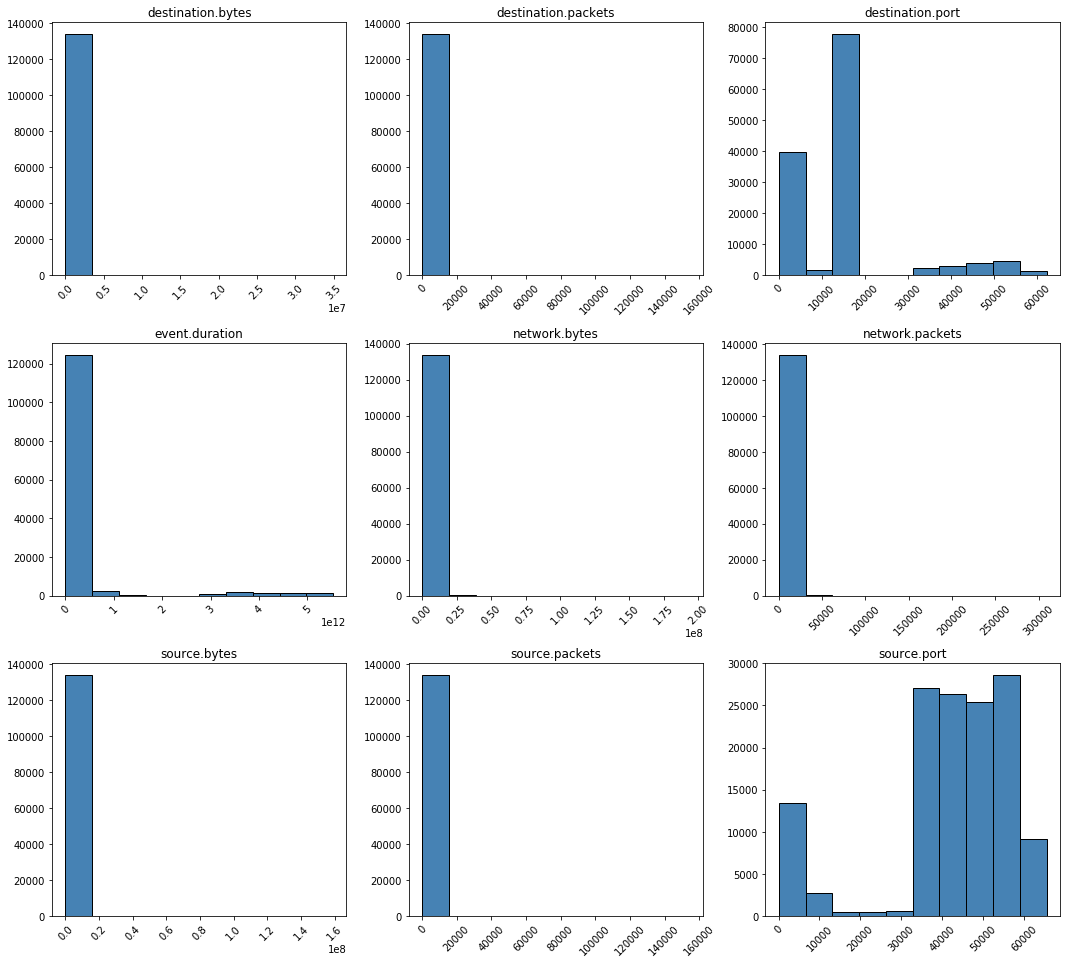

In [47]:
import matplotlib.pyplot as plt

fig = data.hist(bins=10,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))

PLOT estandarizado

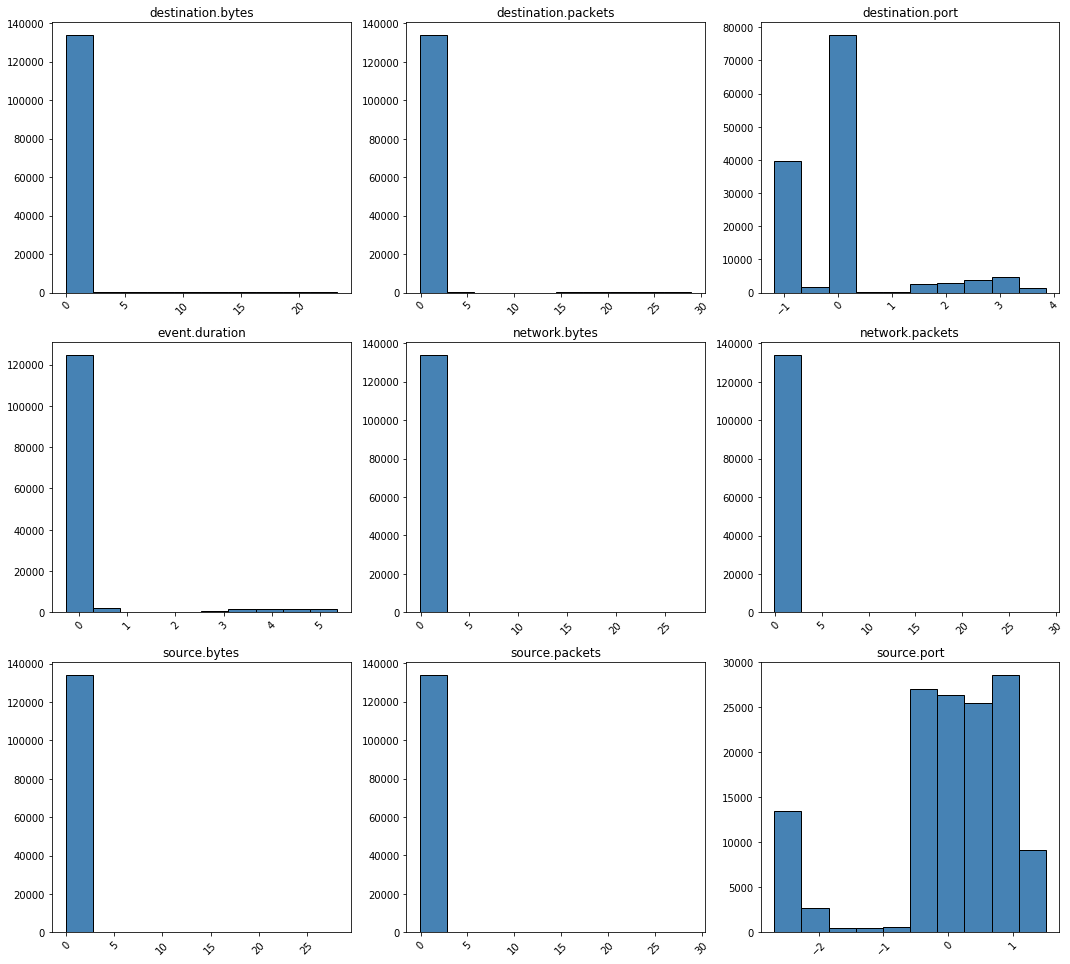

In [46]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
X_standarized = StandardScaler().fit_transform(data)
columns = data.columns.values.tolist()
standarized_df = pd.DataFrame(data=X_standarized, columns=columns)

fig = standarized_df.hist(bins=10,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))